## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary


**The  business problem and aim of the project**

Being an international theme park company, the client has a large operation and finds it difficult to be sure of its business decisions. One of the major ways that it can be more certain of its actions is via the reviews of the visitors at the parks. However, this source of data represents an enormous dataset for the company to analyze on its own. The aim of the project is to properly analyze the sample of 35000 reviews about the parks, and to transform data into actionable insights.

**Approach to solve the problem**

To appropriately deal with such large textual dataset, it is necessary to employ advanced analytical tools and technology. Systematically, the dataset will be processed using complex techniques like descriptive analytics, data visualization, and Natural Language Processing (NLP). By doing so, we could paint an clear picture of the health and performance of the parks in the eyes of their visitors for the decision makers at the theme park company.

**Major findings after analysis**

The proposed approach revealed some major findings using after being used on given data. For example, via data visualization (section 2.1), it was revealed that for the California theme park sees mostly United Stated visitors and Paris park sees mostly United Kingdom traffice while Hong Kong branch has a more balanced traffic. Sentiment analysis (section 4.1 and 4.2) revealed significant drop in sentiment at the Paris theme park, especially in terms of 'services'. Topic modelling (section 5.1 to 5.4) pointed out the most popular likes and dislikes of visitors over a 5 year period.
These insights could help the client significantly in deciding their marketing and operational strategies to maximize performance of the parks and improve sentiment of customers toward them.

<a id = "cell_exploration"></a>
### 2. Data Exploration


In [ ]:
#Importing libraries

## Regular data analytics
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import datetime
import numpy as np
from statistics import mean


## Textual data processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re  #Regular expression operation package

## Sentiment Analysis
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
### Relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## LDR text analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud
import math

## Gensim model
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#
import gensim.corpora as corpora
from gensim.models import CoherenceModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Mounting drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing data

df = pd.read_csv("/content/drive/MyDrive/ThemeParkReviews.csv",
                 sep = ",", encoding='latin')

In [ ]:
#Checking data
print("Keys of dataset: \n{}".format(df.keys()))
print(" ")
print(df.shape)
print(" ")
print(df.dtypes)
print(" ")
print(df.head(20))

Keys of dataset: 
Index(['Review_ID', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')
 
(35000, 5)
 
Review_ID             int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object
 
    Review_ID Year_Month Reviewer_Location  \
0   148524565    2012-12     United States   
1   346403028     2015-3     United States   
2   284580024     2015-6     United States   
3   410306562    2015-12            Canada   
4   358484811     2015-7     United States   
5   298031178     2015-8    United Kingdom   
6   150795761     2013-1     United States   
7   143214528    2012-10     United States   
8   356231044     2016-3     United States   
9   314497757     2015-9     United States   
10  165161255     2013-6         Australia   
11  373895397     2016-5     United States   
12  658923313     2019-3     United States   
13  121905078    missing     United States   
14  1269470

#### 2.1. Data cleaning

In [ ]:
# Replacing empty strings (" ") with NaN for easier detection
df.replace(" ", pd.NA, inplace=True)

# Checking for missing values
print('CHECKING FOR MISSING VALUES')
print(df.isna().sum().sort_values(ascending=0))

CHECKING FOR MISSING VALUES
Review_ID            0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64


In [ ]:
df.loc[df['Review_ID']=='missing']

,Review_ID,Year_Month,Reviewer_Location,Review_Text,Branch


In [ ]:
#Checking duplicated locations
sortloc = df['Reviewer_Location'].unique()
sortloc.sort()
print(sortloc)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda'
 'Argentina' 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belgium' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Cambodia' 'Canada'
 'Cayman Islands' 'Chile' 'China' 'Colombia' 'Cook Islands' 'Costa Rica'
 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia' "Côte d'Ivoire"
 'Democratic Republic of the Congo' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Falkland Islands (Islas Malvinas)' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece'
 'Grenada' 'Guam' 'Guatemala' 'Guernsey' 'Haiti' 'Honduras' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland'
 'Isle of Man' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jersey' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kuwait' 'Laos' 'Latvia' 'Lebanon' 'Lithuania'
 'Luxembourg' 'Macau' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Mali'


In [ ]:
#Checking date data
dfdate = df['Year_Month'].unique()
print(dfdate)

['2012-12' '2015-3' '2015-6' '2015-12' '2015-7' '2015-8' '2013-1'
 '2012-10' '2016-3' '2015-9' '2013-6' '2016-5' '2019-3' 'missing' '2012-3'
 '2012-7' '2013-5' '2018-10' '2018-3' '2017-1' '2013-12' '2017-6'
 '2016-10' '2012-1' '2016-7' '2017-5' '2016-8' '2017-12' '2017-4' '2014-5'
 '2016-2' '2015-4' '2017-8' '2014-11' '2011-2' '2015-11' '2011-7' '2015-2'
 '2018-8' '2017-10' '2014-1' '2016-12' '2012-9' '2014-12' '2012-8'
 '2016-6' '2013-11' '2014-6' '2017-2' '2016-1' '2010-12' '2013-7' '2014-9'
 '2018-2' '2013-3' '2011-4' '2016-11' '2013-8' '2018-4' '2014-3' '2018-9'
 '2018-11' '2018-6' '2018-12' '2018-1' '2011-12' '2017-11' '2015-10'
 '2011-8' '2014-10' '2016-4' '2013-10' '2015-5' '2013-9' '2016-9'
 '2011-10' '2012-5' '2014-4' '2019-2' '2015-1' '2010-7' '2013-2' '2011-11'
 '2017-3' '2014-8' '2018-7' '2012-2' '2013-4' '2011-5' '2012-11' '2019-1'
 '2018-5' '2011-3' '2017-7' '2014-7' '2012-4' '2012-6' '2011-9' '2014-2'
 '2017-9' '2019-4' '2010-8' '2011-1' '2011-6' '2010-11' '2010-10' '201

In [ ]:
#cCleaning out 'missing' values in Year_Month
df.drop(df.loc[df['Year_Month']=='missing'].index, inplace=True)

In [ ]:
#Checking date data again
dfdate = df['Year_Month'].unique()
print(df.shape)
print(dfdate)

(32813, 5)
['2012-12' '2015-3' '2015-6' '2015-12' '2015-7' '2015-8' '2013-1'
 '2012-10' '2016-3' '2015-9' '2013-6' '2016-5' '2019-3' '2012-3' '2012-7'
 '2013-5' '2018-10' '2018-3' '2017-1' '2013-12' '2017-6' '2016-10'
 '2012-1' '2016-7' '2017-5' '2016-8' '2017-12' '2017-4' '2014-5' '2016-2'
 '2015-4' '2017-8' '2014-11' '2011-2' '2015-11' '2011-7' '2015-2' '2018-8'
 '2017-10' '2014-1' '2016-12' '2012-9' '2014-12' '2012-8' '2016-6'
 '2013-11' '2014-6' '2017-2' '2016-1' '2010-12' '2013-7' '2014-9' '2018-2'
 '2013-3' '2011-4' '2016-11' '2013-8' '2018-4' '2014-3' '2018-9' '2018-11'
 '2018-6' '2018-12' '2018-1' '2011-12' '2017-11' '2015-10' '2011-8'
 '2014-10' '2016-4' '2013-10' '2015-5' '2013-9' '2016-9' '2011-10'
 '2012-5' '2014-4' '2019-2' '2015-1' '2010-7' '2013-2' '2011-11' '2017-3'
 '2014-8' '2018-7' '2012-2' '2013-4' '2011-5' '2012-11' '2019-1' '2018-5'
 '2011-3' '2017-7' '2014-7' '2012-4' '2012-6' '2011-9' '2014-2' '2017-9'
 '2019-4' '2010-8' '2011-1' '2011-6' '2010-11' '2010-10' '20

In [ ]:
#Checking duplicated reviews
duplicates = pd.concat(g for _, g in df.groupby("Review_Text") if len(g) > 1)
duplicates.shape

(36, 5)

In [ ]:
#Dropping duplicates in Review_Text
df = df.drop_duplicates(subset=["Review_Text"], keep='first')
df.shape

(32795, 5)

In [ ]:
df['Review_ID'].count()

32795

In [ ]:
#Splitting Year_Month to Year and Month
df[['Year','Month']] = df['Year_Month'].str.split('-',expand=True)
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df.head(10)

,Review_ID,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,148524565,2012-12,United States,"Loved seeing the Christmas lights at the park, but the crowds were the worst we had ever seen. We have been to Disneyland many times and have experienced long wait times in the past, but this visi...",California,2012,12
1,346403028,2015-3,United States,"I'm not sure reviewing Disneyland even has a point. Always a great day couple of days with the family. My kids love it, of course.",California,2015,3
2,284580024,2015-6,United States,Went to Disneyland for one day. We arrive at opening and left at midnight. We loved all it had to offer. My kids are older so we did not spend time waiting in line to meet characters. Use the fast...,California,2015,6
3,410306562,2015-12,Canada,I travelled to Disneyland from Toronto in December 2015 for the very first time. It was EVERYthing that you can imagine. I've dreamed about that day since I was a little girl and was so happy I go...,California,2015,12
4,358484811,2015-7,United States,This place might be ok for families with kids. My wife and I went to remember our past experiences when things were much less expensive. The park is packed with guests and hard to navigate. Prices...,California,2015,7
5,298031178,2015-8,United Kingdom,"I love that Disneyland continues to evolve, and yet so many of the original features still exist. As it had been a few years since I last visited, I wanted to offer a few words of advice: 1. Plan ...",California,2015,8
6,150795761,2013-1,United States,My teenage granddaughters has a good time but commented that the rides were not as big as they expected. we had some nice meals there and the park was not crowded the week following the MLK hol...,California,2013,1
7,143214528,2012-10,United States,"It is Disneyland . . the happiest place on earth. Some of the rides were down, but that happens. Lots of good times with friends.",California,2012,10
8,356231044,2016-3,United States,Let me start off by saying I was in Cali with my family visiting so disney was not the destination but we decided to take the kids. We went on Monday 3 7 during the afternoon. It was not crowded w...,California,2016,3
9,314497757,2015-9,United States,"Although we are pass holders, Disneyland isn't just another place. This place truly is magical. It doesn't matter why you are there, or how diverse your group is. There is something for everyone. ...",California,2015,9


#### 2.2. Top 10 locations of origin of review

In [ ]:
#Reviewing target data column
df['Reviewer_Location'].describe()

count             32795
unique              155
top       United States
freq              11082
Name: Reviewer_Location, dtype: object

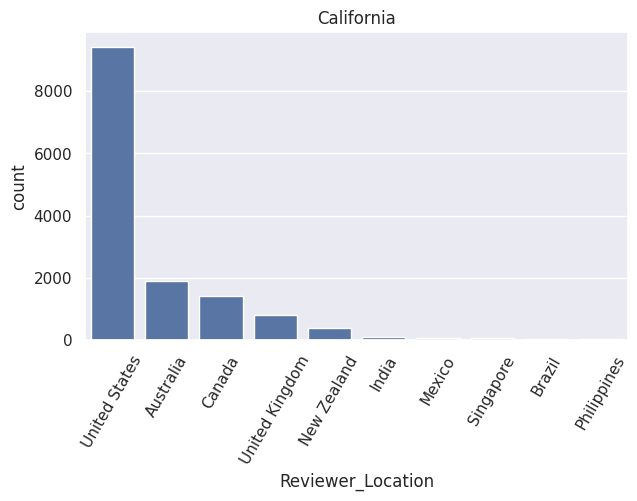

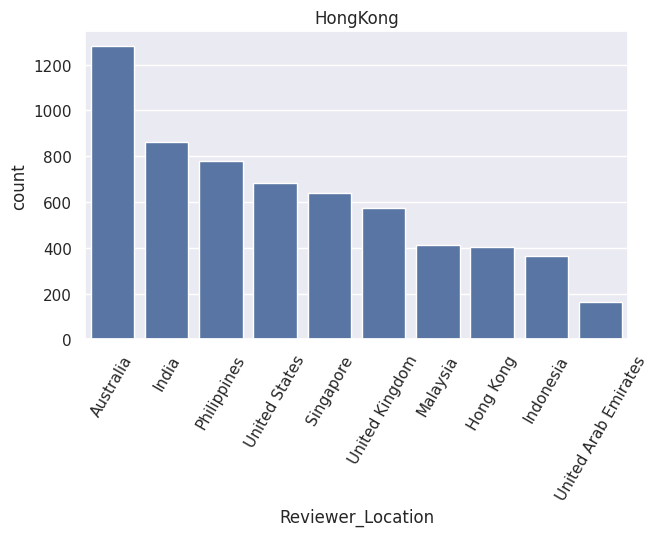

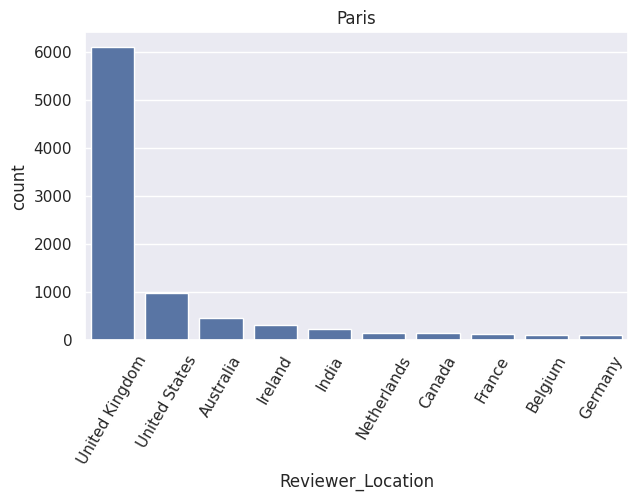

In [ ]:
#Visualizing 10 top review locations of different theme parks
branches = df['Branch'].unique()                      #Getting list of theme parks
sns.set_theme(rc={'figure.figsize':(7,4)})
for x in branches:                                    #Looping visualization for each park
  loc = df.loc[df['Branch']==x]
  loccount = loc['Reviewer_Location'].value_counts()
  toploc = loccount.head(10)
  toploc = toploc.to_frame().reset_index()
  toploc = toploc.rename(columns= {0: 'Reviewer_Location'})
  sns.barplot(x='Reviewer_Location',
          y="count",
          data=toploc,
          order=toploc.sort_values('count',ascending = False).Reviewer_Location)
  plt.xticks(rotation=60)
  plt.title(x)
  plt.show()

**Comment:**

There are clear differences between the theme parks in terms of top 10.
While California theme park is dominated by United States visitors and Paris park is mostly visited by United Kingdom people, Hong Kong branch sees a less skewed distribution and have a more even top 10. One possible explanation is that Hong Kong is more accessible to international visitors and therefore, sees a more diverse traffic.


#### 2.3. Visitor traffic at California branch (Domestic vs. International)

In [ ]:
#Isolating instances from California branch
df_cali = df.loc[df['Branch']=='California']
#Categorizing reviews as International/Domestic
df_cali.loc[df_cali.Reviewer_Location	 != 'United States', 'Type_of_Reviewer'] = 'International'
df_cali.loc[df_cali.Reviewer_Location	 == 'United States', 'Type_of_Reviewer'] = 'Domestic'
df_cali.head(10)

<ipython-input-156-c3d8f71fd1ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cali.loc[df_cali.Reviewer_Location	 != 'United States', 'Type_of_Reviewer'] = 'International'


,Review_ID,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month,Type_of_Reviewer
0,148524565,2012-12,United States,"loved seeing the christmas lights at the park, but the crowds were the worst we had ever seen. we have been to disneyland many times and have experienced long wait times in the past, but this visi...",California,2012,12,Domestic
1,346403028,2015-3,United States,"i'm not sure reviewing disneyland even has a point. always a great day couple of days with the family. my kids love it, of course.",California,2015,3,Domestic
2,284580024,2015-6,United States,went to disneyland for one day. we arrive at opening and left at midnight. we loved all it had to offer. my kids are older so we did not spend time waiting in line to meet characters. use the fast...,California,2015,6,Domestic
3,410306562,2015-12,Canada,i travelled to disneyland from toronto in december 2015 for the very first time. it was everything that you can imagine. i've dreamed about that day since i was a little girl and was so happy i go...,California,2015,12,International
4,358484811,2015-7,United States,this place might be ok for families with kids. my wife and i went to remember our past experiences when things were much less expensive. the park is packed with guests and hard to navigate. prices...,California,2015,7,Domestic
5,298031178,2015-8,United Kingdom,"i love that disneyland continues to evolve, and yet so many of the original features still exist. as it had been a few years since i last visited, i wanted to offer a few words of advice: 1. plan ...",California,2015,8,International
6,150795761,2013-1,United States,my teenage granddaughters has a good time but commented that the rides were not as big as they expected. we had some nice meals there and the park was not crowded the week following the mlk hol...,California,2013,1,Domestic
7,143214528,2012-10,United States,"it is disneyland . . the happiest place on earth. some of the rides were down, but that happens. lots of good times with friends.",California,2012,10,Domestic
8,356231044,2016-3,United States,let me start off by saying i was in cali with my family visiting so disney was not the destination but we decided to take the kids. we went on monday 3 7 during the afternoon. it was not crowded w...,California,2016,3,Domestic
9,314497757,2015-9,United States,"although we are pass holders, disneyland isn't just another place. this place truly is magical. it doesn't matter why you are there, or how diverse your group is. there is something for everyone. ...",California,2015,9,Domestic


In [ ]:
#Checking period of time contained in the dataset
timecheck = df_cali['Year_Month'].unique()
timecheck.sort()
print(timecheck)

['2010-10' '2010-11' '2010-12' '2010-5' '2010-6' '2010-7' '2010-8'
 '2010-9' '2011-1' '2011-10' '2011-11' '2011-12' '2011-2' '2011-3'
 '2011-4' '2011-5' '2011-6' '2011-7' '2011-8' '2011-9' '2012-1' '2012-10'
 '2012-11' '2012-12' '2012-2' '2012-3' '2012-4' '2012-5' '2012-6' '2012-7'
 '2012-8' '2012-9' '2013-1' '2013-10' '2013-11' '2013-12' '2013-2'
 '2013-3' '2013-4' '2013-5' '2013-6' '2013-7' '2013-8' '2013-9' '2014-1'
 '2014-10' '2014-11' '2014-12' '2014-2' '2014-3' '2014-4' '2014-5'
 '2014-6' '2014-7' '2014-8' '2014-9' '2015-1' '2015-10' '2015-11'
 '2015-12' '2015-2' '2015-3' '2015-4' '2015-5' '2015-6' '2015-7' '2015-8'
 '2015-9' '2016-1' '2016-10' '2016-11' '2016-12' '2016-2' '2016-3'
 '2016-4' '2016-5' '2016-6' '2016-7' '2016-8' '2016-9' '2017-1' '2017-10'
 '2017-11' '2017-12' '2017-2' '2017-3' '2017-4' '2017-5' '2017-6' '2017-7'
 '2017-8' '2017-9' '2018-1' '2018-10' '2018-11' '2018-12' '2018-2'
 '2018-3' '2018-4' '2018-5' '2018-6' '2018-7' '2018-8' '2018-9' '2019-1'
 '2019-2' '201

Yearly traffic for domestic visitors only
   Year  count
0  2010     32
1  2011    514
2  2012   1272
3  2013   1185
4  2014   1322
5  2015   1681
6  2016   1454
7  2017   1068
8  2018    754
9  2019    145
Yearly traffic for international visitors only
   Year  count
0  2010     28
1  2011    292
2  2012    605
3  2013    761
4  2014    848
5  2015    958
6  2016    824
7  2017    625
8  2018    491
9  2019     91
Yearly traffic for all visitors
   Year  domestic  international
1  2011       514            292
2  2012      1272            605
3  2013      1185            761
4  2014      1322            848
5  2015      1681            958
6  2016      1454            824
7  2017      1068            625
8  2018       754            491


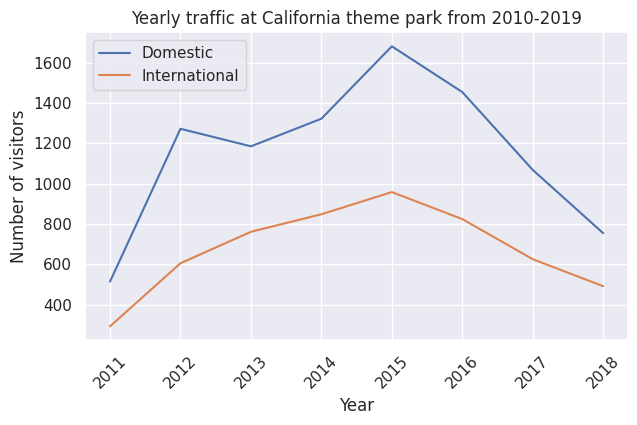

In [ ]:
#Checking yearly traffic
## for domestic visitors only
df_cali_mod = df_cali.loc[df_cali['Type_of_Reviewer']=='Domestic']
yearly1 = df_cali_mod['Year'].value_counts()
yearly1 = yearly1.to_frame().reset_index()
yearly1 = yearly1.sort_values(by=['Year'], ascending=True)
yearly1 = yearly1.reset_index(drop=True)
print("Yearly traffic for domestic visitors only")
print(yearly1)

## for international visitors only
df_cali_mod = df_cali.loc[df_cali['Type_of_Reviewer']=='International']
yearly2 = df_cali_mod['Year'].value_counts()
yearly2 = yearly2.to_frame().reset_index()
yearly2 = yearly2.sort_values(by=['Year'], ascending=True)
yearly2 = yearly2.reset_index(drop=True)
print("Yearly traffic for international visitors only")
print(yearly2)

#Joining international yearly traffic data into domestic one
yearly1['international']=yearly2['count']
yearly1 = yearly1.rename(columns={'count': 'domestic'})
yearly1 = yearly1.drop(yearly1[yearly1['Year'] == 2010].index) #Dropping 2010 as we do not have data for the whole year
yearly1 = yearly1.drop(yearly1[yearly1['Year'] == 2019].index) #Dropping 2019 as we do not have data for the whole year
yearly1 = yearly1.sort_values(by=['Year'], ascending=True)
print("Yearly traffic for all visitors")
print(yearly1)

#Visualizing yearly traffic
plt.plot(yearly1['Year'], yearly1['domestic'],label='Domestic')
plt.plot(yearly1['Year'], yearly1['international'],label='International')
plt.title("Yearly traffic at California theme park from 2010-2019")
plt.xlabel("Year")
plt.ylabel("Number of visitors")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

**Comment:**

Overall, from a yearly perspective, both domestic and international traffic have significantly similar behavior during the 10 year period.

However, this trend did temporarily halt in 2013 where international traffic continued to grow while domestic counterpart dipped slightly. Moreover, it could also be seen that changes in domestic traffic tend to be more intense as there was significant gaps during the entire period. This could be explained by the dominance of 'United States' in distribution of visitors' country of origin at the park as seen above.

Month traffic for domestic visitors only
    Month  count
0       1    601
1       2    610
2       3    824
3       4    786
4       5    805
5       6    965
6       7    993
7       8    791
8       9    705
9      10    905
10     11    609
11     12    833
Monthly traffic for international visitors only
    Month  count
0       1    386
1       2    309
2       3    350
3       4    446
4       5    458
5       6    402
6       7    523
7       8    597
8       9    593
9      10    564
10     11    364
11     12    531
Monthly traffic for all visitors
    Month  domestic  international
0       1     601.0          386.0
1       2     610.0          309.0
2       3     824.0          350.0
3       4     786.0          446.0
4       5     724.5          412.2
5       6     965.0          402.0
6       7     993.0          523.0
7       8     791.0          597.0
8       9     705.0          593.0
9      10     905.0          564.0
10     11     609.0          364.0
11     12     83

<ipython-input-155-733ac4f82ae5>:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[724.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  monthly1.domestic[monthly1.Month==5] = monthly1.domestic[monthly1.Month==5]*0.9                   #Accounting for the fact that May is present in 10 years while others are in 9 only.
<ipython-input-155-733ac4f82ae5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly1.international[monthly1.Month==5] = monthly1.international[monthly1.Month==5]*0.9         #Accounting for the fact that May is present in 10 years while others are in 9 only.
<ipython-input-155-733ac4f82ae5>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

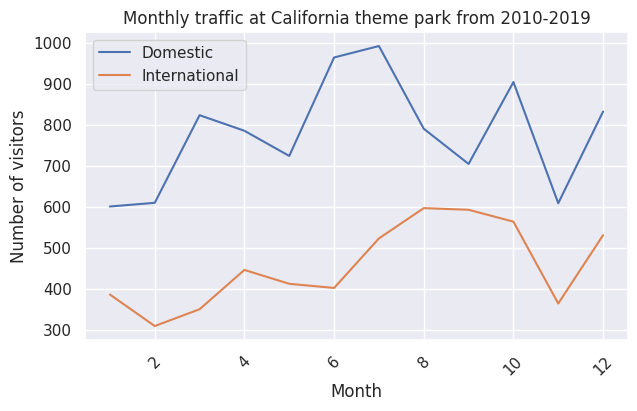

In [ ]:
#Checking monthly traffic
## for domestic visitors only
df_cali_mod = df_cali.loc[df_cali['Type_of_Reviewer']=='Domestic']
monthly1 = df_cali_mod['Month'].value_counts()
monthly1 = monthly1.to_frame().reset_index()
monthly1 = monthly1.sort_values(by=['Month'], ascending=True)
monthly1 = monthly1.reset_index(drop=True)
print("Month traffic for domestic visitors only")
print(monthly1)

## for international visitors only
df_cali_mod = df_cali.loc[df_cali['Type_of_Reviewer']=='International']
monthly2 = df_cali_mod['Month'].value_counts()
monthly2 = monthly2.to_frame().reset_index()
monthly2 = monthly2.sort_values(by=['Month'], ascending=True)
monthly2 = monthly2.reset_index(drop=True)
print("Monthly traffic for international visitors only")
print(monthly2)

#Joining all monthly count dataframes
monthly1['international']=monthly2['count']
monthly1 = monthly1.rename(columns={'count': 'domestic'})
monthly1.domestic[monthly1.Month==5] = monthly1.domestic[monthly1.Month==5]*0.9                   #Accounting for the fact that May is present in 10 years while others are in 9 only.
monthly1.international[monthly1.Month==5] = monthly1.international[monthly1.Month==5]*0.9         #Accounting for the fact that May is present in 10 years while others are in 9 only.
monthly1 = monthly1.sort_values(by=['Month'], ascending=True)
print("Monthly traffic for all visitors")
print(monthly1)

#Visualizing monthly traffic
plt.plot(monthly1['Month'], monthly1['domestic'],label='Domestic')
plt.plot(monthly1['Month'], monthly1['international'],label='International')
plt.title("Monthly traffic at California theme park from 2010-2019")
plt.xlabel("Month")
plt.ylabel("Number of visitors")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

**Comment:**

As it can be seen from the graph, the two traffic of visitor differs in many ways in terms of trend and intensity.
Nevertheless, domestic traffic continued to far exceed international traffic at every month due to the dominance of United States visitors.

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

**Aim:** To demonstrate your understanding in sentiment analysis.

_Use sentiment analysis to answer question (C) and (D)._

#### 3.1. Sentiment about theme parks

In [ ]:
#Checking theme park list
df['Branch'].unique()

array(['California', 'HongKong', 'Paris'], dtype=object)

In [ ]:
#Separating review texts about different theme parks
dfcali = df.loc[df['Branch']=='California']
dfparis = df.loc[df['Branch']=='Paris']
dfhk = df.loc[df['Branch']=='HongKong']
print(dfcali.shape)
print(dfparis.shape)
print(dfhk.shape)
print(df.shape)

(14950, 7)
(10361, 7)
(7484, 7)
(32795, 7)


In [ ]:
#Preparing review text about California theme park
textcali = dfcali['Review_Text'].str.cat(sep='.')
textcali = textcali.replace(',','.')
sents  = sent_tokenize(textcali)
#Calculating positive sentiment about the theme park
sid = SentimentIntensityAnalyzer()
scorescompound = []
scorespositive = []
for s in range(len(sents)):
       scorescompound.append(sid.polarity_scores(sents[s])['compound'])
       scorespositive.append(sid.polarity_scores(sents[s])['pos'])

compound_score_cali = np.mean(scorescompound)
print("Overall sentiment score about California theme park is:",compound_score_cali)
pos_score_cali = np.mean(scorespositive)
print("Positive sentiment score about California theme park is:",pos_score_cali)

Overall sentiment score about California theme park is: 0.17404397984782488
Positive sentiment score about California theme park is: 0.14030037354579036


In [ ]:
#Preparing review text about Paris theme park
textparis = dfparis['Review_Text'].str.cat(sep='.')
textparis = textparis.replace(',','.')
sents     = sent_tokenize(textparis)
#Calculating positive sentiment about the theme park
sid = SentimentIntensityAnalyzer()
scorescompound = []
scorespositive = []
for s in range(len(sents)):
       scorescompound.append(sid.polarity_scores(sents[s])['compound'])
       scorespositive.append(sid.polarity_scores(sents[s])['pos'])

compound_score_paris = np.mean(scorescompound)
print("Overall sentiment score about California theme park is:",compound_score_paris)
pos_score_paris = np.mean(scorespositive)
print("Positive sentiment score about California theme park is:",pos_score_paris)

Overall sentiment score about California theme park is: 0.1469144451368504
Positive sentiment score about California theme park is: 0.12376030272716837


In [ ]:
#Preparing review text about Hong Kong theme park
texthk = dfhk['Review_Text'].str.cat(sep='.')
texthk = texthk.replace(',','.')
sents  = sent_tokenize(texthk)
#Calculating positive sentiment about the theme park
sid = SentimentIntensityAnalyzer()
scorescompound = []
scorespositive = []
for s in range(len(sents)):
       scorescompound.append(sid.polarity_scores(sents[s])['compound'])
       scorespositive.append(sid.polarity_scores(sents[s])['pos'])

compound_score_hk = np.mean(scorescompound)
print("Overall sentiment score about California theme park is:",compound_score_hk)
pos_score_hk = np.mean(scorespositive)
print("Positive sentiment score about California theme park is:",pos_score_hk)

Overall sentiment score about California theme park is: 0.20169018794729449
Positive sentiment score about California theme park is: 0.1451934653200455


In [ ]:
# Putting results into dataframe
# Creating data
sent_scores = [['compound',compound_score_cali,compound_score_paris,compound_score_hk],['positive',pos_score_cali,pos_score_paris,pos_score_hk]]

# Create the pandas DataFrame
sent_scores = pd.DataFrame(sent_scores, columns=['score_type', 'California','Paris','HongKong'])
sent_scores = sent_scores.set_index('score_type')
sent_scores

,California,Paris,HongKong
score_type,,,
compound,0.174044,0.146914,0.201690
positive,0.140300,0.123760,0.145193


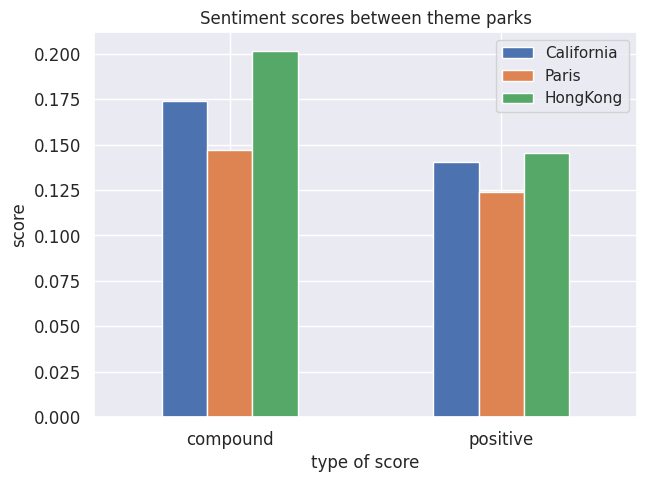

In [ ]:
#Visualize the dataframe
ax = sent_scores[['California','Paris','HongKong']].plot(kind='bar', title ="Sentiment scores between theme parks", figsize=(7, 5), legend=True, fontsize=12)
ax.set_xlabel("type of score", fontsize=12)
ax.set_ylabel("score", fontsize=12)
plt.xticks(rotation=0)
plt.show()

**Comment:**

In both type of scores, HongKong branch take the lead, having the best overall sentiment and most positive sentiment, while California takes the second and Paris has the last place. The gaps are less intense in positive score point of view.

#### 3.2. Sentiment on services at theme parks

In [ ]:
#Define function to compute positive sentiment score for aspect
def aspect_sentiment(aspect,sents,scores):
    AspSen = []
    for s in range(len(sents)):
        #Check if the aspect is mentioned in the text trunk
        Index = sents[s].find(aspect)
        if Index > 0:
            AspSen.append(scores[s])
    Sentiment = [AspSen[x]['pos'] for x in range(len(AspSen))]

    #Return average of sentiment scores of aspect
    return [round(mean(Sentiment),3)]
print("aspect_sentiment is succesfully created!")

aspect_sentiment is succesfully created!


In [ ]:
#Positive sentiment about "services" at Hong Kong theme park
texthk = texthk.replace(',','.')
sents  = sent_tokenize(texthk)
scores = []
for s in range(len(sents)):
       scores.append(sid.polarity_scores(sents[s]))
scoreshk = aspect_sentiment('services',sents,scores)
scoreshk = scoreshk[0]
print('services: ', scoreshk)

services:  0.135


In [ ]:
#Positive sentiment about "services" at Paris theme park
textparis = textparis.replace(',','.')
sents  = sent_tokenize(textparis)
scores = []
for s in range(len(sents)):
       scores.append(sid.polarity_scores(sents[s]))
scoresparis = aspect_sentiment('services',sents,scores)
scoresparis = scoresparis[0]
print('services: ', scoresparis)

services:  0.082


In [ ]:
#Positive sentiment about "services" at California theme park
textcali = textcali.replace(',','.')
sents  = sent_tokenize(textcali)
scores = []
for s in range(len(sents)):
       scores.append(sid.polarity_scores(sents[s]))
scorescali = aspect_sentiment('services',sents,scores)
scorescali = scorescali[0]
print('services: ', scorescali)

services:  0.131


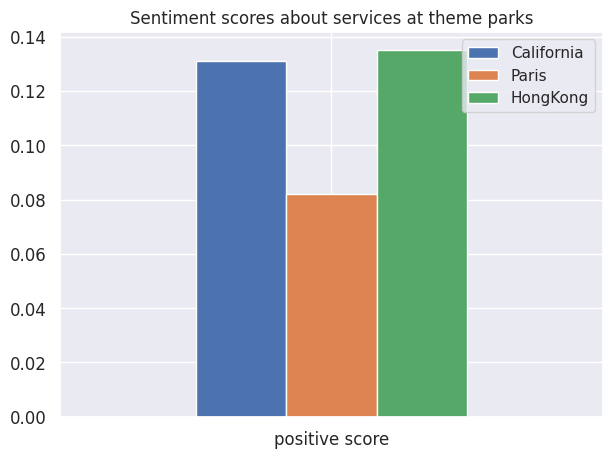

In [ ]:
# Putting results into dataframe
# Creating data
serv_sent_scores = [['positive score',scorescali,scoresparis,scoreshk]]

# Create the pandas DataFrame
serv_sent_scores = pd.DataFrame(serv_sent_scores, columns=['', 'California','Paris','HongKong'])
serv_sent_scores = serv_sent_scores.set_index('')

#Visualize the dataframe
ax = serv_sent_scores[['California','Paris','HongKong']].plot(kind='bar', title ="Sentiment scores about services at theme parks", figsize=(7, 5), legend=True, fontsize=12)
plt.xticks(rotation=0)
plt.show()

**Comment:**

The bar chart shows that while California and HongKong branches are close to positive sentiment about their services, Paris theme park exhibits a significant lag behind.

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling


#### 4.1. Data preprocessing

In [ ]:
#Reindex the data
df = df.reset_index()
df = df.drop('index', axis=1)
df.head(10)

,Review_ID,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,148524565,2012-12,United States,"loved seeing the christmas lights at the park, but the crowds were the worst we had ever seen. we have been to disneyland many times and have experienced long wait times in the past, but this visi...",California,2012,12
1,346403028,2015-3,United States,"i'm not sure reviewing disneyland even has a point. always a great day couple of days with the family. my kids love it, of course.",California,2015,3
2,284580024,2015-6,United States,went to disneyland for one day. we arrive at opening and left at midnight. we loved all it had to offer. my kids are older so we did not spend time waiting in line to meet characters. use the fast...,California,2015,6
3,410306562,2015-12,Canada,i travelled to disneyland from toronto in december 2015 for the very first time. it was everything that you can imagine. i've dreamed about that day since i was a little girl and was so happy i go...,California,2015,12
4,358484811,2015-7,United States,this place might be ok for families with kids. my wife and i went to remember our past experiences when things were much less expensive. the park is packed with guests and hard to navigate. prices...,California,2015,7
5,298031178,2015-8,United Kingdom,"i love that disneyland continues to evolve, and yet so many of the original features still exist. as it had been a few years since i last visited, i wanted to offer a few words of advice: 1. plan ...",California,2015,8
6,150795761,2013-1,United States,my teenage granddaughters has a good time but commented that the rides were not as big as they expected. we had some nice meals there and the park was not crowded the week following the mlk hol...,California,2013,1
7,143214528,2012-10,United States,"it is disneyland . . the happiest place on earth. some of the rides were down, but that happens. lots of good times with friends.",California,2012,10
8,356231044,2016-3,United States,let me start off by saying i was in cali with my family visiting so disney was not the destination but we decided to take the kids. we went on monday 3 7 during the afternoon. it was not crowded w...,California,2016,3
9,314497757,2015-9,United States,"although we are pass holders, disneyland isn't just another place. this place truly is magical. it doesn't matter why you are there, or how diverse your group is. there is something for everyone. ...",California,2015,9


In [ ]:
#Joining Hong Kong to avoid taking unnecessary space in word frequency distribution (first trial of the model showed 'hong' and 'kong' as two separate words in the word clouds)
df['Review_Text'] = df['Review_Text'].str.lower()
df['Review_Text'] = df['Review_Text'].str.replace('hong kong','hongkong')

In [ ]:
#Stemming
pd.set_option("display.max_colwidth", 200)
porter = PorterStemmer()

documents = df['Review_Text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # apply stemming operation (Optional)
        for t in range(len(Tokens)):
            Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(review)
    print('-[Review Text]: ', review)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Remove Stop Words
## Setting stopword vocab
nltk.download('stopwords')

stop_words = stopwords.words('english')

# Removing stopwords
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)
    print('-[Cleaned Text]: ', Cleaned_doc[r])

Output hidden; open in https://colab.research.google.com to view.

#### 4.2. Document Term Matrix

In [ ]:
#Saving data
count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<32795x21342 sparse matrix of type '<class 'numpy.int64'>'
	with 1417178 stored elements in Compressed Sparse Row format>

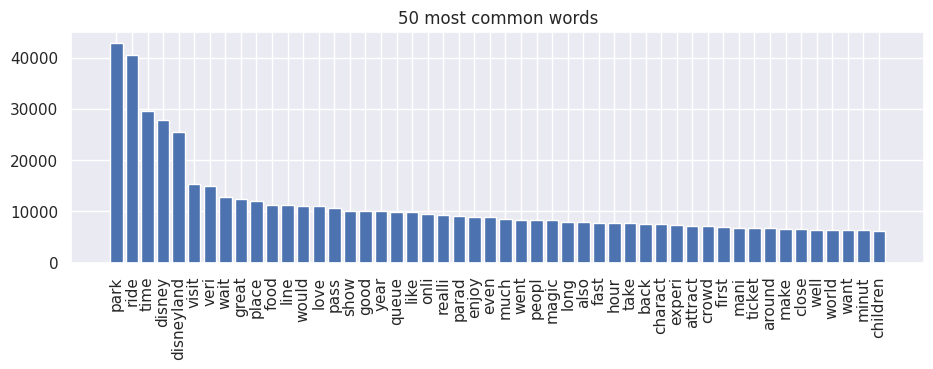

In [ ]:
#Visualizing most frequent words
terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='50 most common words')
plt.bar(words, counts)
plt.xticks(x_pos, words, rotation=90)
plt.show()

#### 4.3. Terms selection

In [ ]:
terms.shape

(21342,)

In [ ]:
#Remove highly frequent and infrequent words
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 20000 and total_counts[t] > 200:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remaining term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex]

Number of Terms Remained:  1082


#### 4.4. LDA Modelling - Sklearn

##### Training LDA on 10 topics

In [ ]:
# Selecting base number of topic
number_topics = 10

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[6.31203049e+01, 3.70744618e+01, 4.17199949e+00, ...,
        5.36568192e+01, 4.74627686e+01, 2.68142435e+01],
       [2.56911815e+00, 6.44451640e+01, 2.19293383e+00, ...,
        2.33287586e+02, 6.37562331e+01, 1.00035846e-01],
       [3.74737443e+01, 6.42649649e+01, 1.63155974e+01, ...,
        1.02455580e+02, 3.23121665e+01, 1.00024653e-01],
       ...,
       [3.77963563e+01, 2.97196398e+02, 6.73788069e+01, ...,
        3.60307510e+02, 1.54952076e+02, 1.26115488e+01],
       [3.08622296e-01, 4.26477821e+00, 4.99310529e+00, ...,
        1.98817853e+01, 9.27335059e+00, 7.84356593e+01],
       [4.81459702e+01, 7.72666340e+01, 3.82785041e+01, ...,
        6.02995039e+02, 1.87093786e+02, 1.12689235e+01]])

##### Word probabilities by topic

In [ ]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[6.56425848e-04 3.85559529e-04 4.33871209e-05 ... 5.58009393e-04
  4.93593752e-04 2.78857375e-04]
 [1.54042252e-05 3.86408004e-04 1.31486543e-05 ... 1.39877354e-03
  3.82277229e-04 5.99806861e-07]
 [2.74314406e-04 4.70430857e-04 1.19433045e-04 ... 7.49992884e-04
  2.36530747e-04 7.32198066e-07]
 ...
 [1.77439596e-04 1.39522467e-03 3.16318011e-04 ... 1.69150747e-03
  7.27441383e-04 5.92064512e-05]
 [2.61093774e-06 3.60799285e-05 4.22415593e-05 ... 1.68199460e-04
  7.84523390e-05 6.63563927e-04]
 [3.67419695e-04 5.89650244e-04 2.92117413e-04 ... 4.60167803e-03
  1.42778184e-03 8.59973202e-05]]


In [ ]:
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
mountain : 0.055
space : 0.030
pirat : 0.018
thunder : 0.017
jone : 0.016

Topic #1:
line : 0.031
crowd : 0.028
wait : 0.025
year : 0.022
visit : 0.020

Topic #2:
pass : 0.063
fast : 0.047
wait : 0.018
line : 0.016
hour : 0.015

Topic #3:
place : 0.039
love : 0.027
visit : 0.025
magic : 0.024
amaz : 0.022

Topic #4:
charact : 0.033
mickey : 0.025
love : 0.017
great : 0.016
daughter : 0.015

Topic #5:
world : 0.024
pari : 0.021
florida : 0.020
like : 0.017
visit : 0.017

Topic #6:
peopl : 0.018
would : 0.013
staff : 0.013
member : 0.012
like : 0.009

Topic #7:
queue : 0.028
hotel : 0.016
veri : 0.012
hour : 0.011
would : 0.011

Topic #8:
ticket : 0.030
show : 0.018
parad : 0.018
firework : 0.017
water : 0.013

Topic #9:
veri : 0.044
food : 0.032
good : 0.024
staff : 0.021
visit : 0.019


In [ ]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

,abov,absolut,accept,access,accommod,across,action,activ,actual,addit,...,wors,worst,worth,would,write,wrong,year,young,younger,zone
0,0.000656,0.000386,4.338712e-05,0.000267,1.258703e-05,0.000269,2.845889e-04,0.000285,0.000392,0.000643,...,1.040162e-06,1.950242e-04,0.001983,0.001387,1.040196e-06,0.000004,0.002931,0.000558,0.000494,2.788574e-04
1,0.000015,0.000386,1.314865e-05,0.000007,9.313915e-05,0.000214,5.996780e-07,0.000261,0.000955,0.000403,...,1.682087e-04,2.080302e-04,0.004249,0.009388,2.003372e-04,0.000851,0.021994,0.001399,0.000382,5.998069e-07
2,0.000274,0.000470,1.194330e-04,0.002349,2.624279e-04,0.000937,6.228733e-05,0.000597,0.000847,0.000450,...,2.836124e-05,3.071716e-06,0.005635,0.005796,5.314203e-05,0.000065,0.002900,0.000750,0.000237,7.321981e-07
3,0.000293,0.004887,8.916747e-07,0.000081,2.272676e-06,0.000026,3.204385e-05,0.001142,0.000438,0.000182,...,6.788340e-07,6.788606e-07,0.006096,0.006215,8.788615e-05,0.000506,0.008129,0.003599,0.000469,2.639110e-05
4,0.000418,0.000857,9.956738e-07,0.000217,1.073548e-04,0.000658,9.956839e-07,0.000307,0.000958,0.000410,...,9.956772e-07,9.957278e-07,0.003544,0.003296,1.192343e-04,0.000028,0.012955,0.002490,0.000475,3.785890e-05
5,0.000231,0.000903,6.677262e-05,0.000421,2.128890e-05,0.000721,2.765154e-04,0.000066,0.003105,0.000704,...,1.569369e-04,5.820759e-05,0.003496,0.011497,9.675070e-05,0.000627,0.003219,0.000371,0.001277,5.525881e-04
6,0.000497,0.000965,9.272557e-04,0.000877,8.785902e-04,0.000695,4.372907e-04,0.000038,0.002670,0.000659,...,1.498995e-03,1.790152e-03,0.000361,0.012866,8.461102e-04,0.001527,0.004382,0.000451,0.000035,1.158641e-04
7,0.000177,0.001395,3.163180e-04,0.000800,2.976590e-04,0.000304,1.465261e-04,0.000050,0.001322,0.000063,...,1.626211e-04,2.403363e-04,0.004172,0.010614,1.766575e-04,0.000404,0.005788,0.001692,0.000727,5.920645e-05
8,0.000003,0.000036,4.224156e-05,0.000653,9.457901e-07,0.000081,6.974751e-05,0.000507,0.000595,0.000352,...,5.991512e-06,7.294988e-05,0.003033,0.005471,2.688435e-05,0.000162,0.001308,0.000168,0.000078,6.635639e-04
9,0.000367,0.000590,2.921174e-04,0.002042,6.724951e-04,0.000139,1.585061e-04,0.000982,0.000086,0.000329,...,1.626967e-05,9.073505e-06,0.005119,0.006280,8.001072e-07,0.000145,0.005562,0.004602,0.001428,8.599732e-05


In [ ]:
!pip install wordcloud

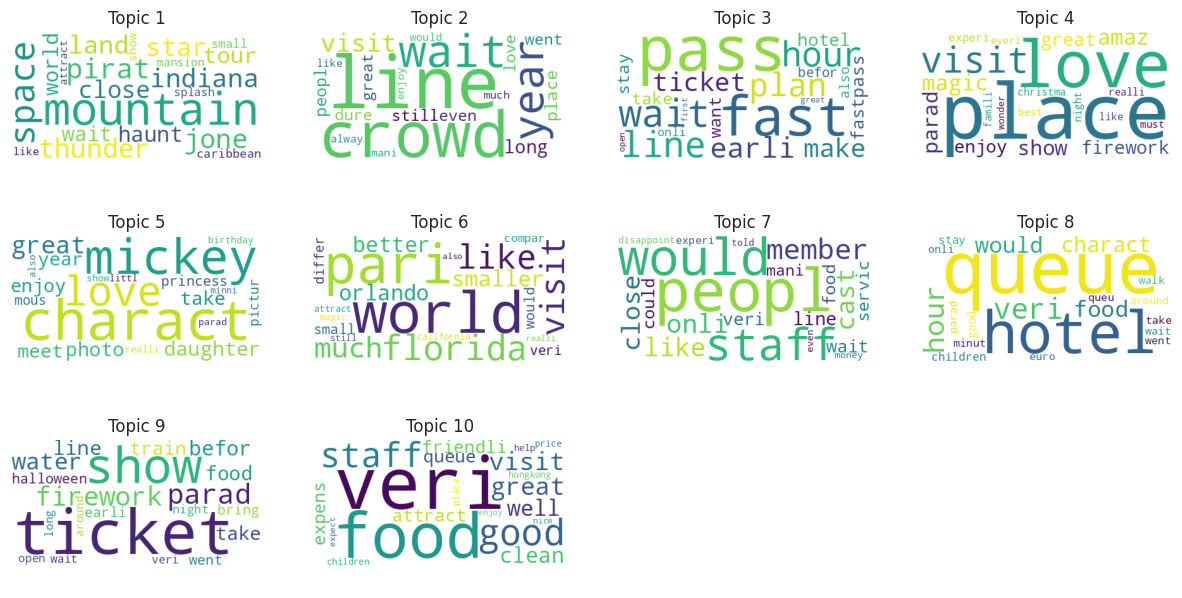

In [ ]:
# Word cloud visualization
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    ## convert to dictionary type - keep top 20 words
    Word_Frequency = dict(count_dict[0:20])
    ## generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    ## visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))
plt.show()

**Comment:**

Interpretation of the topics:

Topic 1: Having mentioned various themes at theme parks, this topic is likely about most popular themes. With 'like' as one of the keywords, it could indicate positive sentiment.

Topic 2: This topic refers to long waiting lines and crowdedness at the parks.

Topic 3: This word clous is likely to refer to the fastpass at the parks. These allow people to bypass the waiting line, which can easily spark interest in visitors.

Topic 4: This topic is generally positive. It associates this sentiment with firework, parade, and christmas.

Topic 5: This topic is about the characters at the parks. It also shows a liking tone and the favourite activity with the characters.

Topic 6: This topic is likely about people comparing the Paris park with others as 'pari' and a lot of comparison word were included.

Topic 7: This word cloud mainly again emphasizes the people working at the parks.

Topic 8: This topic again talk about the queueing at the parks and adds 'hotel' and 'food' as highly associated words.

Topic 9: This topic reiterates topic 4, talking about the shows, firework and parade. However, it also mentions the long waiting time to these attractions.

Topic 10: This topic shows popularity of the staff and the food quality at the parks.





In [ ]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(ReducedCount)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

array([0.05868295, 0.14493432, 0.08553186, 0.16591995, 0.06940635,
       0.08983069, 0.09294487, 0.09368966, 0.07518063, 0.12387872])

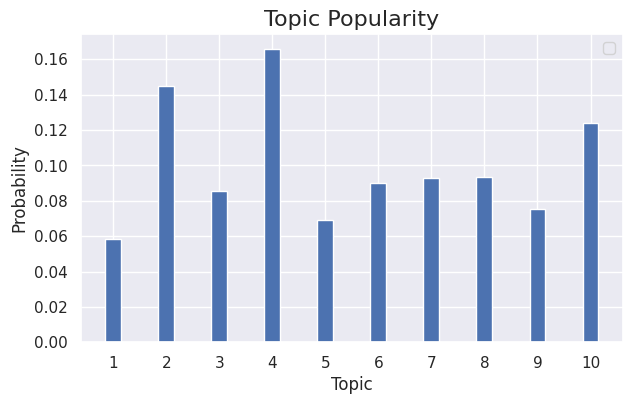

In [ ]:
# Bar chart visualization for topic popularity
## Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

## Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

#####  Topic Probabilities by Reviewer Location

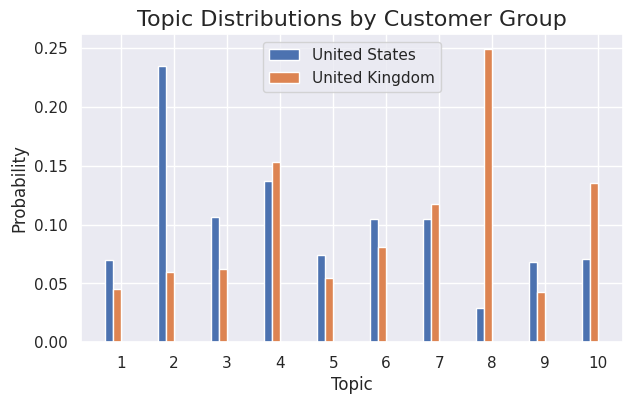

In [ ]:
import numpy as np

Selected_Countries = ['United States','United Kingdom']

Group_Prob = []
for i in range(len(Selected_Countries)):
    ReducedTerm_Selected = ReducedCount[np.where(df['Reviewer_Location'] == Selected_Countries[i])]
    TopicDis_Doc = lda.transform(ReducedTerm_Selected)
    Group_Prob.append(sum(TopicDis_Doc)/sum(sum(TopicDis_Doc)))


#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Distributions by Customer Group', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(len(Selected_Countries)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=Selected_Countries[i])

pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show();

**Comment:**

Looking at just the biggest gap in topic 8, the UK visitor also seems to be more concerned about long waiting lines as well. However, their US counterpart more than make up for it with their overwhelming presence in topic 2, which is generally about the same concern. Additionally, topic 3 exhibit the same trend but with less intensity then topic 2.

The next big gap is in topic 10, which contains 'food', 'staff', 'veri', and 'good' as the biggest words. The graph shows that the UK visitors seem to be more vocal about this than their US counterpart. Topic 3 sees a significant gap as well, showing the US visitors having more interest in the fastpass.

For the remaining topics, they are more popular among the US visitors but do not have significantly gaps like the mentioned ones.





#### 4.5. Experiment on number of topic

In [ ]:
#Data preprocessing
Cleaned_doc_new = []
print('Cleaning text anew')
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)
print('New cleaned document is successfully created!')

Cleaning text anew
New cleaned document is successfully created!


In [ ]:
# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

{'allow': 0, 'awesom': 1, 'chair': 2, 'christma': 3, 'crowd': 4, 'decor': 5, 'dure': 6, 'entri': 7, 'even': 8, 'ever': 9, 'exit': 10, 'experienc': 11, 'holiday': 12, 'light': 13, 'long': 14, 'love': 15, 'mani': 16, 'onli': 17, 'overwhelm': 18, 'past': 19, 'peopl': 20, 'return': 21, 'seen': 22, 'think': 23, 'upon': 24, 'visit': 25, 'wait': 26, 'worst': 27, 'alway': 28, 'coupl': 29, 'cours': 30, 'famili': 31, 'great': 32, 'point': 33, 'review': 34, 'sure': 35, 'activ': 36, 'arriv': 37, 'charact': 38, 'electr': 39, 'enough': 40, 'fantast': 41, 'fast': 42, 'finish': 43, 'firework': 44, 'full': 45, 'left': 46, 'line': 47, 'magic': 48, 'make': 49, 'meet': 50, 'midnight': 51, 'miss': 52, 'night': 53, 'offer': 54, 'older': 55, 'open': 56, 'parad': 57, 'pass': 58, 'reason': 59, 'spend': 60, 'went': 61, 'wonder': 62, 'adventur': 63, 'along': 64, 'also': 65, 'anim': 66, 'around': 67, 'back': 68, 'beauti': 69, 'behind': 70, 'birthday': 71, 'bring': 72, 'buffet': 73, 'california': 74, 'castl': 75, 

In [ ]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=101)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.38155013805833193
Topic Number: 3 -- Coherence: 0.38429984401875855
Topic Number: 4 -- Coherence: 0.39881577796306156
Topic Number: 5 -- Coherence: 0.4073974767879875
Topic Number: 6 -- Coherence: 0.4018592669149128
Topic Number: 7 -- Coherence: 0.41212899761744887
Topic Number: 8 -- Coherence: 0.4126392297183022
Topic Number: 9 -- Coherence: 0.410963092241859
Topic Number: 10 -- Coherence: 0.41116516992783314


Text(0, 0.5, 'Coherence')

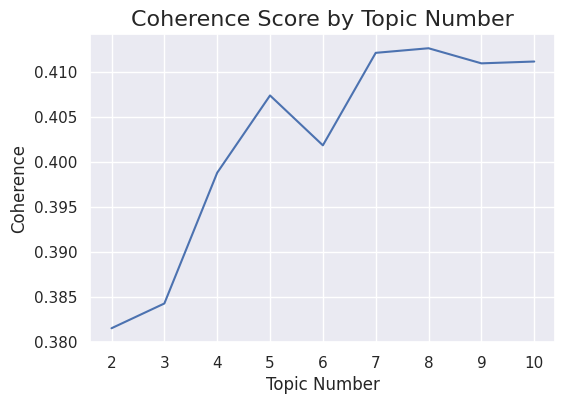

In [ ]:
#Plotting result of cohenrence scores
plt.figure(figsize=(6,4))
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

**Comment:**

As seen from the graph, 8 topics would return the highest cohenrence score though the difference between that and 10 topics show a small gap only. As the process of constructing model is affected by randomness, this gap is likely to be insignificant to the overall picture shown by previous model.

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

The analysis above revealed some major findings using for the client:

- Traffic distribution by countries of origin (2.1): Having known this information, the theme park company can appropriately prepare its marketing strategies to maximize value for its biggest patrons.

- Traffic distribution by year and month (2.2): this information allows managers to properly prepare to handle traffic load in advance.

- Theme park sentiments (section 3): the analysis revealed a weak point being the Paris theme park. It prompts actions to investigate and improve this theme park.

- Topic modelling (section 4): this analysis revealed a major issue in waiting time. Two major visitor groups, US and UK, are very vocal about it. To improve the theme park's perception in visitors, it is highly commended that actions are to be taken to tackle it.

